In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Набор данных: Потребление алкоголя студентами
Социальные, гендерные данные и результаты исследований учащихся средней школы

In [2]:
data = pd.read_csv("student-por.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

# 1. Сколько в наборе данных объектов и признаков? Дать описание каждому признаку, если оно есть.
Всего объектов 649 штук и 33 признака:

    Атрибуты для наборов данных student-mat.csv (курс математики) и student-por.csv (курс португальского языка):
    
    school - школа ученика (двоичный код: "GP" - Габриэль Перейра или "MS" - Мусиньо да Силвейра)
    sex - пол студента (двоичный код: "F" - женщина или "M" - мужчина)
    age - возраст студента (числовой: от 15 до 22 лет)
    address - тип домашнего адреса студента (двоичный: "U" - городской или "R" - сельский)
    famsize - размер семьи (двоичный код: 'LE3' - меньше или равно 3 или 'GT3' - больше 3)
    Pstatus - статус совместного проживания родителей (двоичный: "Т" - проживающий вместе или "А" - порознь)
    Medu - образование матери (числовое значение: 0 - отсутствует, 1 - начальное образование (4–й класс), 2 - 5-9-й классы, 3 – среднее образование или 4 – высшее образование)
    Fedu - образование отца (числовое значение: 0 - отсутствует, 1 - начальное образование (4–й класс), 2 - 5-9-й классы, 3 – среднее образование или 4 – высшее образование)
    Mjob - работа матери (номинальная: "учитель", связанная с "здравоохранением", гражданские "службы" (например, административные или полицейские), "at_home" или "другое")
    Fjob - работа отца (номинальная: "учитель", связанная с "здравоохранением", гражданские "службы" (например, административные или полицейские), "at_home" или "другое")
    reason - причина выбора этой школы (номинальная: близость к "дому", репутация школы, предпочтение "курса" или "другое")
    guardian - опекун учащегося (номинально: "мать", "отец" или "другой")
    traveltime - время в пути от дома до школы (числовое значение: 1 - <15 мин., 2 - от 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - >1 часа)
    studytime - еженедельное учебное время (числовое: 1 - <2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов или 4 - >10 часов)
    failures - количество прошлых сбоев класса (числовое значение: n, если 1<=n<3, иначе 4)
    schoolsup - дополнительная образовательная поддержка (двоичный вариант: да или нет)
    famsup - семейная образовательная поддержка (двоичный вариант: да или нет)
    paid - дополнительные оплачиваемые занятия по предмету курса (математика или португальский язык) (двоичный код: да или нет)
    activities - внеклассные мероприятия (двоичный вариант: да или нет)
    nursery - посещал детский сад (двоичный вариант: да или нет)
    higher - хочет получить высшее образование (двоичный вариант: да или нет)
    internet - Доступ в Интернет дома (двоичный код: да или нет)
    romantic - с романтическими отношениями (бинарный вариант: да или нет)
    famrel - качество семейных отношений (числовое значение: от 1 - очень плохие до 5 - отличные)
    freetime - свободное время после школы (числовое значение: от 1 - очень низкое до 5 - очень высокое)
    goout - свидание с друзьями (числовое значение: от 1 - очень низкое до 5 - очень высокое)
    Dalc - потребление алкоголя в течение рабочего дня (числовое значение: от 1 - очень низкое до 5 - очень высокое)
    Walc - потребление алкоголя в выходные дни (числовое значение: от 1 - очень низкое до 5 - очень высокое)
    health - текущее состояние здоровья (числовое значение: от 1 - очень плохое до 5 - очень хорошее)
    absences - количество пропусков занятий в школе (числовое значение: от 0 до 93)
    
    Эти оценки связаны с предметом курса, математикой или португальским языком:

    G1 - оценка за первый период (числовая: от 0 до 20)
    G2 - оценка за второй период (числовая: от 0 до 20)
    G3 - итоговая оценка (числовая: от 0 до 20, конечный результат)

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# 2. Сколько категориальных признаков, какие?
    15 штук: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health
Они имеют категориальные значения. Некоторые из них содержат оценку удовлетворённости от 1 до 5.

In [4]:
categorised_columns = ["Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]

len(categorised_columns)

15

# 3. Столбец с максимальным количеством уникальных значений категориального признака?
Medu, Fedu, Mjob, Fjob, famrel, freetime, goout, Dalc, Walc, health - 5 уникальных значений

In [5]:
for col in categorised_columns:
    print(col,":\t",len(data[col].value_counts()))

Medu :	 5
Fedu :	 5
Mjob :	 5
Fjob :	 5
reason :	 4
guardian :	 3
traveltime :	 4
studytime :	 4
failures :	 4
famrel :	 5
freetime :	 5
goout :	 5
Dalc :	 5
Walc :	 5
health :	 5


# 4. Есть ли бинарные признаки?
Бинарные признаки:

    school
    sex
    address
    famsize
    Pstatus
    schoolsup
    famsup
    paid
    activities
    nursery
    higher
    internet
    romantic
    
Они имеют всего два уникальных значения

In [6]:
for column in data:
    if len(data[column].value_counts()) == 2:
        print(column)
          
binary_columns = ["school", "sex", "address", "famsize", "Pstatus", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

school
sex
address
famsize
Pstatus
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


# 5. Какие числовые признаки?
Числовые признаки:

    age
    absences
    G1
    G2
    G3

Они содержат величины, которые можно нормализовать через стандартное отклонение

In [7]:
for column in data:
    if len(data[column].value_counts()) > 5:
        print(column)
        
numeric_columns = ["age", "absences", "G1", "G2", "G3"]

age
absences
G1
G2
G3


# 6. Есть ли пропуски?
Проверяю на наличие None (NA) и значений NaN в наборе данных.
Пропусков нет. Набор данных не содержит None

In [8]:
data.isna().values.any()

False

# 7. Сколько объектов с пропусками?
Ноль

# 8. Столбец с максимальным количеством пропусков?
Нет такого

# 9. Есть ли на ваш взгляд выбросы, аномальные значения?
Проверил все уникальные значения каждого поля. Нет выбросов и аномальных значений

In [9]:
for column in data:
    print(column,":\t",data[column].value_counts().keys().tolist())

school :	 ['GP', 'MS']
sex :	 ['F', 'M']
age :	 [17, 16, 18, 15, 19, 20, 21, 22]
address :	 ['U', 'R']
famsize :	 ['GT3', 'LE3']
Pstatus :	 ['T', 'A']
Medu :	 [2, 4, 1, 3, 0]
Fedu :	 [2, 1, 3, 4, 0]
Mjob :	 ['other', 'services', 'at_home', 'teacher', 'health']
Fjob :	 ['other', 'services', 'at_home', 'teacher', 'health']
reason :	 ['course', 'home', 'reputation', 'other']
guardian :	 ['mother', 'father', 'other']
traveltime :	 [1, 2, 3, 4]
studytime :	 [2, 1, 3, 4]
failures :	 [0, 1, 2, 3]
schoolsup :	 ['no', 'yes']
famsup :	 ['yes', 'no']
paid :	 ['no', 'yes']
activities :	 ['no', 'yes']
nursery :	 ['yes', 'no']
higher :	 ['yes', 'no']
internet :	 ['yes', 'no']
romantic :	 ['no', 'yes']
famrel :	 [4, 5, 3, 2, 1]
freetime :	 [3, 4, 2, 5, 1]
goout :	 [3, 2, 4, 5, 1]
Dalc :	 [1, 2, 3, 5, 4]
Walc :	 [1, 2, 3, 4, 5]
health :	 [5, 3, 4, 1, 2]
absences :	 [0, 2, 4, 6, 8, 10, 1, 12, 5, 16, 14, 9, 3, 11, 18, 7, 21, 15, 22, 30, 26, 24, 13, 32]
G1 :	 [10, 11, 12, 13, 14, 9, 8, 15, 7, 16, 17, 6, 

# Нормализация признаков
Провожу нормализацию признаков:

    Для признаков Mjob, Fjob, reason, guardian создаю отдельные столбцы значений, которые содержат единицу, если значение признака в объекте совпадает с ним, а иначе ноль
    
    Признаки famsize, Pstatus, school, sex, address преобразую в числовые типы
    
    Признаки Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health содержат оценку удовлетворённости от 1 до 5, поэтому оставляю единицу, если значение больше или равно среднему (>= 3), иначе ноль
    
    Бинарные признаки schoolsup, famsup, paid, activities, nursery, higher, internet, romantic преобразую в 1/0 (да/нет)
    
    Остальные числовые признаки нормализую через стандартное отклонение

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
label = LabelEncoder()

# Нормализованный набор данных
normal = data.copy()

# Создаю каждый столбец дамми-переменной для кажого значения этих категориальных признаков
for col in ["Mjob", "Fjob", "reason", "guardian"]:
    for val in data[col].value_counts().keys().tolist():
        normal[col + "_is_" + val] = np.where(data[col] == val, 1, 0)

normal.drop(columns=["Mjob", "Fjob", "reason", "guardian"],axis=1,inplace=True)

# Преобразую всё в числовые типы
for col in ["famsize", "Pstatus", "school", "sex", "address"]:
    label.fit(normal[col])
    normal[col] = label.transform(data[col])

# Категориальные признаки оценки от 1 до 5 (Считаю единица, если >= 3, иначе ноль)
for col in ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]:
    normal[col] = np.where(data[col] >= 3, 1, 0)

# Бинарные признаки (да, нет)
for col in ["schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]:
    normal[col] = np.where(data[col] == 'yes', 1, 0)

# Числовые признаки
for col in numeric_columns:
    normal[col] = scaler.fit_transform(data[[col]])

normal

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_is_at_home,Fjob_is_teacher,Fjob_is_health,reason_is_course,reason_is_home,reason_is_reputation,reason_is_other,guardian_is_mother,guardian_is_father,guardian_is_other
0,0,0,1.031695,1,0,0,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,0,0.210137,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,-1.432980,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,-1.432980,1,0,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,-0.611422,1,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,1.853254,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
645,1,0,1.031695,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
646,1,0,1.031695,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
647,1,1,0.210137,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# 10. Столбец с максимальным средним значением после нормировки признаков через стандартное отклонение?
G1 - max: 2.85 * 10^(-16)

In [11]:
normal[numeric_columns].describe()

,age,absences,G1,G2,G3
count,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02
mean,-1.751723e-16,2.189654e-17,2.846550e-16,-2.189654e-17,1.094827e-17
std,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00
min,-1.432980e+00,-7.891595e-01,-4.155470e+00,-3.974080e+00,-3.688165e+00
25%,-6.114218e-01,-7.891595e-01,-5.100253e-01,-5.392978e-01,-5.904309e-01
50%,2.101367e-01,-3.578630e-01,-1.454808e-01,-1.958196e-01,2.911583e-02
75%,1.031695e+00,5.047298e-01,5.836082e-01,4.911368e-01,6.486626e-01
max,4.317929e+00,6.111583e+00,2.770875e+00,2.552006e+00,2.197530e+00


# 11. Столбец с целевым признаком?

Я объеденил Dalc и Walc (Потребление алкоголя в будние дни и выходные) в показатель alc, где Dalc учитывается с коэффициентом 5/7, т.е. доля будних дней в неделе, а Walc с 2/7 - доля выходных дней в неделе. Итого 1 <= alc <= 5

Тренировочная выборка train, и результаты target

In [12]:
Dalc = data["Dalc"]
Walc = data["Walc"]

train = normal.drop(["Dalc","Walc"], axis=1)

alc = np.ceil( (5.0/7.0) * Dalc + (2.0/7.0) * Walc )

target = alc

alc

0      1.0
1      1.0
2      3.0
3      1.0
4      2.0
      ... 
644    2.0
645    1.0
646    1.0
647    4.0
648    4.0
Length: 649, dtype: float64

# 12. Сколько объектов попадает в тренировочную выборку при использовании train_test_split с параметрами test_size = 0.3, random_state = 42?

Тренировочная выборка состоит из 454 объектов.

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size = 0.3, random_state = 42)

print(len(X_train))
train

454


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_is_at_home,Fjob_is_teacher,Fjob_is_health,reason_is_course,reason_is_home,reason_is_reputation,reason_is_other,guardian_is_mother,guardian_is_father,guardian_is_other
0,0,0,1.031695,1,0,0,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,0,0.210137,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,-1.432980,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,-1.432980,1,0,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,-0.611422,1,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,1.853254,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
645,1,0,1.031695,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
646,1,0,1.031695,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
647,1,1,0.210137,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# 13. Между какими признаками наблюдается линейная зависимость (корреляция)?
Между G1, G2 и G3 наблюдается линейная зависимость (> 85%).
Я построил схему, по которой это видно

In [14]:
corr = data[numeric_columns].corr()

Качаю библиотеку seaborn

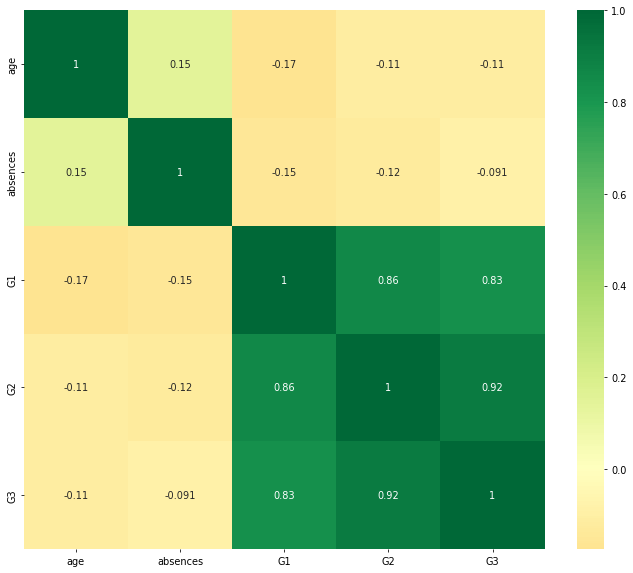

In [15]:
import piplite as pl
await pl.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10), dpi= 70)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 14. Сколько признаков достаточно для объяснения 90% дисперсии после применения метода PCA?
Всего достаточно 24 компоненты. Это довольно много для анализа данных

In [16]:
from sklearn.decomposition import PCA

pca = None

for i in range(1,44):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    
    if sum(pca.explained_variance_ratio_) >= 0.9:
        print("Min components:",i,'\n',pca.explained_variance_ratio_)
        break

pd.DataFrame(pca.components_, columns=list(X_train.columns))

Min components: 24 
 [0.25320947 0.10606899 0.08150172 0.04916321 0.03884037 0.03510057
 0.0303705  0.02855327 0.02559777 0.02477456 0.02348921 0.0215427
 0.02056904 0.01980815 0.01890514 0.01761725 0.01691366 0.01550168
 0.01446169 0.01415314 0.01284593 0.01223451 0.01215679 0.01139971]


In [17]:
components_data = pd.DataFrame(pca.components_, columns=list(train.columns))

components_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_is_at_home,Fjob_is_teacher,Fjob_is_health,reason_is_course,reason_is_home,reason_is_reputation,reason_is_other,guardian_is_mother,guardian_is_father,guardian_is_other
0,0.103599,0.020749,0.198462,-0.048856,-0.013854,0.000418,-0.068248,-0.069097,0.022681,-0.044549,...,0.010353,-0.007055,-0.005395,0.037194,-0.017919,-0.059169,0.039894,-0.007599,-0.016024,0.023624
1,-0.099353,-0.007843,0.693384,0.059872,0.011636,-0.033901,0.040919,0.021272,-0.037123,0.008833,...,0.003761,-0.005962,-0.011461,-0.057357,0.022100,0.057489,-0.022231,0.006733,-0.083429,0.076696
2,-0.136848,0.071698,-0.627561,0.106113,0.029961,-0.042706,0.127450,0.108410,-0.021322,-0.041938,...,-0.013716,0.013060,0.019254,-0.082835,0.066834,0.024865,-0.008864,0.039882,0.015676,-0.055558
3,-0.149228,0.199965,0.176255,0.149733,0.017616,0.020547,0.442517,0.400803,-0.088555,0.035570,...,-0.001041,0.036319,0.024174,-0.058140,-0.049681,0.087907,0.019914,0.032807,-0.008447,-0.024360
4,0.217369,-0.101615,0.028143,-0.164546,-0.078987,0.067230,-0.165829,0.006503,0.078929,-0.013821,...,0.062725,0.022092,0.007410,0.211712,-0.203275,-0.073903,0.065466,-0.279606,0.254476,0.025130
5,-0.005728,0.188753,0.023745,0.009393,-0.021151,0.046493,0.001586,0.051193,-0.014207,-0.050679,...,-0.053853,0.002042,0.005161,-0.329995,0.141312,0.160856,0.027828,-0.538691,0.478566,0.060124
6,0.071273,-0.007929,0.041777,-0.010427,0.120721,-0.031562,-0.138348,-0.255134,-0.026045,-0.003169,...,0.010270,-0.058356,-0.006123,-0.571106,0.234037,0.201428,0.135640,0.289462,-0.214211,-0.075251
7,0.027473,-0.539126,0.013302,0.010400,-0.174412,-0.055028,0.176355,0.210179,-0.053186,0.143337,...,0.029620,0.020717,0.028482,-0.285867,0.214485,0.047554,0.023828,-0.096926,0.069568,0.027359
8,0.181735,0.143962,-0.018841,-0.323024,0.171179,0.006810,0.019491,0.032065,0.132738,-0.123467,...,0.001537,-0.014396,0.009175,-0.265337,-0.029120,0.201759,0.092698,-0.119548,0.117058,0.002490
9,0.276304,-0.242987,-0.067098,-0.275795,-0.080994,0.037559,0.088953,0.146660,0.016468,0.026854,...,0.013457,0.038968,-0.014833,0.015499,-0.215929,0.225908,-0.025477,0.176507,-0.149256,-0.027251


In [18]:
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()
linmodel.fit(X_train,Y_train)
linmodel.predict(X_test)
linmodel.score(X_test, Y_test)

0.056632321124750806

In [19]:
X_pca = pca.transform(X_train)
X_pca

array([[ 1.59453844, -0.09393841, -1.19720275, ..., -0.1168435 ,
        -0.23825271, -0.31697936],
       [ 0.30449563,  1.18913522,  2.56931311, ..., -0.17110535,
        -0.35603858,  0.32777385],
       [-1.06367081, -1.27176531,  0.68189379, ..., -0.3309968 ,
         0.14953346, -0.1158445 ],
       ...,
       [-1.9704509 , -0.09515399,  0.5915419 , ..., -0.41886718,
         0.01225843,  0.1090077 ],
       [ 0.59738117, -1.94404671,  0.26433385, ..., -0.39865663,
        -0.39058703, -0.11146162],
       [-0.91510383, -1.04571718,  0.90662789, ...,  0.2718428 ,
        -0.3230281 ,  0.16044412]])

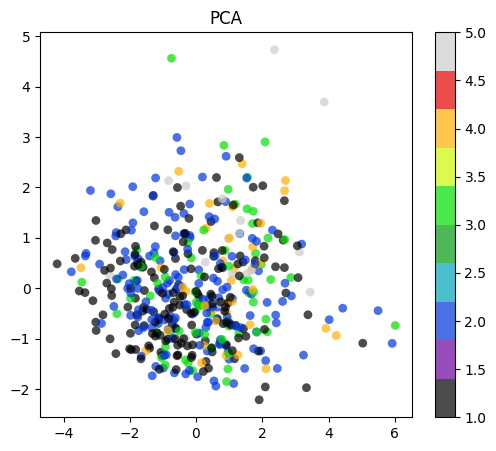

In [20]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_train, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA')

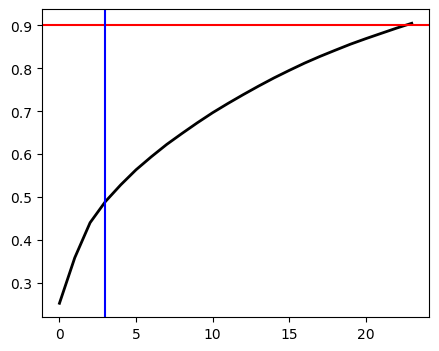

In [21]:
plt.figure(figsize=(5,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(3, c='b')

# 15. Какой признак вносит наибольший вклад в первую компоненту?
Первый признак вносит наибольший вклад в первую компоненту (~25%)

# 16. Построить двухмерное представление данных с помощью алгоритма t-SNE. На сколько кластеров визуально, на ваш взгляд, разделяется выборка? Объяснить смысл кластеров.

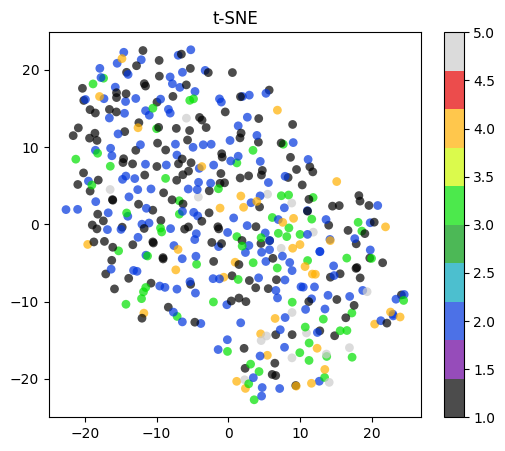

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_train, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('t-SNE')